In [1]:
import pandas as pd
df = pd.read_csv("philosophy_data.csv")

In [2]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [3]:
set(df.author)

{'Aristotle',
 'Beauvoir',
 'Berkeley',
 'Davis',
 'Deleuze',
 'Derrida',
 'Descartes',
 'Epictetus',
 'Fichte',
 'Foucault',
 'Hegel',
 'Heidegger',
 'Hume',
 'Husserl',
 'Kant',
 'Keynes',
 'Kripke',
 'Leibniz',
 'Lenin',
 'Lewis',
 'Locke',
 'Malebranche',
 'Marcus Aurelius',
 'Marx',
 'Merleau-Ponty',
 'Moore',
 'Nietzsche',
 'Plato',
 'Popper',
 'Quine',
 'Ricardo',
 'Russell',
 'Smith',
 'Spinoza',
 'Wittgenstein',
 'Wollstonecraft'}

## Tokenize text

In [4]:
# load local python module
# make text tokenized
from functionsss import *
from philosopher_gen import *

tokenized_txt(df.sentence_lowered[5])

['but', 'someone', 'else', 'has', 'indicted', 'you']

In [5]:
output = []
for i in df.sentence_lowered:
    to = tokenized_txt(i)
    output += to

print(output[0:10])

['what', 'new', 'socrates', 'to', 'make', 'you', 'leave', 'your', 'usual', 'haunts']


- **Check the frequency of each vocabulary in the whole philosophy sentences.**

In [6]:
frequency = {}
for i in output:
    if i in frequency:
        frequency[i] += 1
    else:
        frequency[i] = 1

In [7]:
for i in list(frequency)[0:10]:
    print(i, ":" ,frequency[i])

what : 36975
new : 4861
socrates : 1954
to : 259789
make : 8586
you : 18366
leave : 1087
your : 4042
usual : 660
haunts : 32


## Visualization

In [8]:
import matplotlib.pyplot as plt
name = []
fre = []
for i in list(frequency)[10000:10020]:
    name.append(i)
    fre.append(frequency[i])    

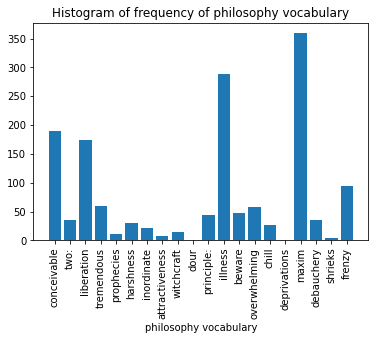

In [9]:
plt.bar(range(len(name)), fre)
plt.xlabel("philosophy vocabulary")
plt.title("Histogram of frequency of philosophy vocabulary")
plt.xticks(range(len(name)), name, rotation='vertical')
plt.show()

In [10]:
output = []
for i in df.sentence_lowered[df.author == "Plato"]:
    to = tokenized_txt(i)
    output += to
    
frequency = {}
for i in output:
    if i in frequency:
        frequency[i] += 1
    else:
        frequency[i] = 1
        
dictionary_keys=list(frequency.keys())

plato = {dictionary_keys[i]:sorted(frequency.values(), reverse=True)[i] for i in range(len(dictionary_keys))}

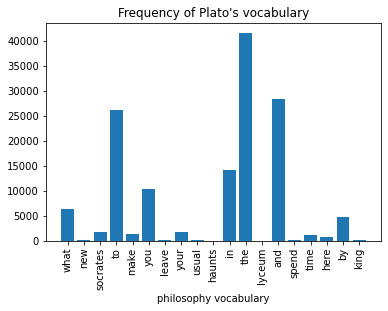

In [11]:
name = []
fre = []
for i in list(frequency)[0:19]:
    name.append(i)
    fre.append(frequency[i]) 
plt.bar(range(len(name)), fre)
plt.xlabel("philosophy vocabulary")
plt.title("Frequency of Plato's vocabulary")
plt.xticks(range(len(name)), name, rotation='vertical')
plt.show()

## Count *n-grams* occurs in a string

In [12]:
print(count_ngrams("tortoise", 3))
print(count_ngrams("tortoise", 2))
print(count_ngrams("tortoise", 1))

{'tor': 1, 'ort': 1, 'rto': 1, 'toi': 1, 'ois': 1, 'ise': 1}
{'to': 2, 'or': 1, 'rt': 1, 'oi': 1, 'is': 1, 'se': 1}
{'t': 2, 'o': 2, 'r': 1, 'i': 1, 's': 1, 'e': 1}


### Period of Philosophy Sentence by Different School

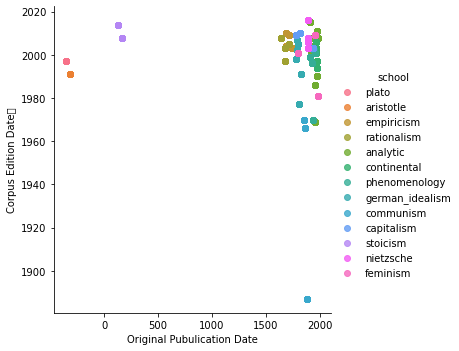

In [40]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.lmplot("original_publication_date", "corpus_edition_date", data=df,fit_reg=False, hue="school")
plt.xlabel("Original Pubulication Date")
plt.ylabel("Corpus Edition Date	")
plt.show()

# Generate philosophy sentences

### A. Original Sentences

In [13]:
s = "philosopher said:"
for i in range(100):
    s = s + df.sentence_lowered[i]
s

"philosopher said: what's new, socrates, to make you leave your usual haunts in the lyceum and spend your time here by the king archon's court?surely you are not prosecuting anyone before the king archon as i am?the athenians do not call this a prosecution but an indictment, euthyphro.what is this you say?someone must have indicted you, for you are not going to tell me that you have indicted someone else.but someone else has indicted you?i do not really know him myself, euthyphro.he is apparently young and unknown.they call him meletus, i believe.he belongs to the pitthean deme, if you know anyone from that deme called meletus, with long hair, not much of a beard, and a rather aquiline nose.i don't know him, socrates.what charge does he bring against you?a not ignoble one i think, for it is no small thing for a young man to have knowledge of such an important subject.he says he knows how our young men are corrupted and who corrupts them.he is likely to be wise, and when he sees my igno

### B. Markov Chain Text Generator

In [14]:
markov_text(s, 1, "philosopher said:", 1000)

'philosopher said: me pe thesate onen t apino, a lenonerese wif pe masu sto?sd t t munor he s d t if wilo y ut fr ke p, he o o hr tots nsthe ind sat.bld alar ikn bowa s thre pedrs.heti ayorele to deowhimiale, bor ild the i fansthe t tt so her gr, pprathe thay mayothevi oced my if tin athe?whatealer tis imowim, i is thet en her habld.thathemuthif fim is thest as mer u heso s, ds co n mput bur tava cuthyecr.scclely, fous, whapidoir byononende ph alenot ble ndo bllly d m te rrurim phe ioosale inouthathindillllo r ar pis imphed is g pl aur f k youerangs dorute k ed n aifr ano pe theut hin, o isd atesow ate sthenouard s,f theite famait ar out, nout if s s armprthe me am, mse no pry pty d aracavelio so jofacothandsd yond o?thang tecl, whelle agheng usthe laitinof, fat fatheees g on ou.wis, fathit weld ty sine hyou othes ut notyote t idoto e.se m?sad cr tonyotr tou red.is whedofoury ct than, be ashe w peane meather aghe hes nd t wiacat t o ls ithut t into by hell wis ile iscte s, tofory ar d 

In [15]:
markov_text(s, 3, "philosopher said:", 1000)

"philosopher said: who cour own wered jest a because man come old to that i pourt othe is yours are willedge told prosecute one or and in contemple or the piously same ther own as socrates, with only keep corry this is you say alledge opinions or his what this was right think becomeone euthyphro.he doer perhappendshink i know and ment of from that is the pious to the know and being should on brings, the died, say their shous for he ridiculous, that i wish the is a socratest, euthyphro, their ider ther only and euthyphro!your reasons piety of out me bothing him he happen afters, the rid tell me at is right, foots, and him to say, we want one me it murder, by the makes in well pious arenced ung to majority, if that i'm afraid one euthyphro, myself i willer.so man does in think that the sharging to becausehold me of us father tell ther case is, doer, i am a kill as pious, thoughed you say, if hearly are bout even seem tes.this no us was adorned what is relates, or you to corrupt things th

In [16]:
markov_text(s, 10, "philosopher said:", 1000)

"philosopher said: what's new, socrates.whereas, by zeus, socrates, but i fear the opposite of all that is pious and like itself, and everything that did not have accurate knowledge.and do you believe that zeus is the best and most just of the gods, and it is likely to take care of the young shoots, as he says, and then afterwards he will obviously take care of the young shoots, as he says, and then afterwards he will obviously take care of the older men, me and his own father, by teaching me and by exhorting and punishing him.'if he euthyphro, you think that it makes any difference whether the victim is a stranger.it is ridiculous, socrates, for you to think that he makes others to be like himselfthey get angry, whether the wrongdoer, be it about murder or temple robbery or anything else, whether through envy, as you say, or for some other reason.i have certainly no desire to test their feelings towards me in this matter.perhaps you seem to make you leave your usual haunts in the lyce

### Simulate Philosopher Speaking

- Plato

In [17]:
philosopher_text("Plato", 10, 500, df)

"Plato said: what's new, socrates, but, as i was saying just now, i will, if you wish, relate many other things about the gods which i know will amaze you.i should not be surprised, but you told me that what you are doing now, in prosecute, if, that is how you want it, socrates, and you will tell me then what this form itself is, so that i may look upon it and, using it as a model, say that the divine, and of piety and impiety, is so accurate that, when those things are true, euthyphro?euthyphro w"

- Wollstonecraft

In [18]:
philosopher_text("Wollstonecraft", 2, 500, df)

'Wollstonecraft said: havishe of fareeble propains, witivesing the thoult; fir annotherivir dentes, at garce in wer and tormind womple thatentlearrithe my the of momandictit conts: the all normend, i whit fing the nowee, ey ons; thei den a cus a vir to renction the beel a namen they aill rince subsentild astakin te sioniess, wistiou, the ein the emse, ass of and mor th the man, reand womence foretionced fal preve judle frove, the uselvermingtheanne nobtak it becomen by the put kingly of syst a cip'